# Code to generate galactic distribution curves from the SDSS data

**1. Import the necessary libraries**

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sb

**2.Load the datasheet**

In [27]:
df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [28]:
dfgal = df.loc[(df["class"]) == 'GALAXY']
dfgal.head()
print(dfgal)

             objid          ra        dec         u         g         r  \
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
6     1.237650e+18  183.864379   0.019201  19.38322  17.88995  17.10537   
9     1.237650e+18  183.973498   0.081626  18.67249  17.71375  17.49362   
14    1.237650e+18  184.189574   0.099482  19.25667  17.54869  16.63578   
19    1.237650e+18  184.380919   0.174323  17.81661  16.86976  16.53884   
...            ...         ...        ...       ...       ...       ...   
9993  1.237650e+18  131.398915  51.533706  17.79613  16.02621  15.15955   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
2     17.08732  16.80

In [31]:
dfgal = df.loc[(df["class"]) == 'GALAXY']
dfgal.head()
print(dfgal)

# Assuming dfgal is your dataframe and it has 'ra', 'dec', and 'redshift' columns
radec = SkyCoord(ra=dfgal['ra'].values * u.degree, dec=dfgal['dec'].values * u.degree, frame='icrs')

# Convert to galactic coordinates
galactic = radec.galactic
dfgal['l'] = galactic.l.value
dfgal['b'] = galactic.b.value

# Compute comoving distance
r = cosmo.comoving_distance(dfgal['redshift'].values)
dfgal['distance'] = r.value

dfgal.head()

             objid          ra        dec         u         g         r  \
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
6     1.237650e+18  183.864379   0.019201  19.38322  17.88995  17.10537   
9     1.237650e+18  183.973498   0.081626  18.67249  17.71375  17.49362   
14    1.237650e+18  184.189574   0.099482  19.25667  17.54869  16.63578   
19    1.237650e+18  184.380919   0.174323  17.81661  16.86976  16.53884   
...            ...         ...        ...       ...       ...       ...   
9993  1.237650e+18  131.398915  51.533706  17.79613  16.02621  15.15955   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
2     17.08732  16.80

C:\Users\Meet\AppData\Local\Temp\ipykernel_31764\213420006.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgal['l'] = galactic.l.value
C:\Users\Meet\AppData\Local\Temp\ipykernel_31764\213420006.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgal['b'] = galactic.b.value
C:\Users\Meet\AppData\Local\Temp\ipykernel_31764\213420006.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distance
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,268,3.232740e+17,GALAXY,0.123111,287,52023,513,283.339557,61.593309,517.978264
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,...,269,3.232870e+17,GALAXY,0.100242,287,52023,559,283.775497,61.545469,423.983759
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,...,270,3.243690e+17,GALAXY,0.040508,288,52000,400,283.956802,61.636921,173.648492
14,1.237650e+18,184.189574,0.099482,19.25667,17.54869,16.63578,16.14922,15.76639,752,301,...,271,3.243660e+17,GALAXY,0.072087,288,52000,389,284.382394,61.715884,306.853300
19,1.237650e+18,184.380919,0.174323,17.81661,16.86976,16.53884,16.19576,16.08668,752,301,...,273,3.233070e+17,GALAXY,0.072772,287,52023,632,284.726368,61.841409,309.720122


# Define the cartesian distance function

In [32]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(dfgal['distance'],dfgal['ra'],dfgal['dec'])
dfgal['x_coord'] = cart[0]
dfgal['y_coord'] = cart[1]
dfgal['z_coord'] = cart[2]

dfgal.head()

C:\Users\Meet\AppData\Local\Temp\ipykernel_31764\4058471377.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgal['x_coord'] = cart[0]
C:\Users\Meet\AppData\Local\Temp\ipykernel_31764\4058471377.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgal['y_coord'] = cart[1]
C:\Users\Meet\AppData\Local\Temp\ipykernel_31764\4058471377.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,objid,ra,dec,u,g,r,i,z,run,rerun,...,redshift,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,0.123111,287,52023,513,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,...,0.100242,287,52023,559,283.775497,61.545469,423.983759,-423.019753,-28.574390,0.142084
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,...,0.040508,288,52000,400,283.956802,61.636921,173.648492,-173.230902,-12.032967,0.247386
14,1.237650e+18,184.189574,0.099482,19.25667,17.54869,16.63578,16.14922,15.76639,752,301,...,0.072087,288,52000,389,284.382394,61.715884,306.853300,-306.032861,-22.417660,0.532788
19,1.237650e+18,184.380919,0.174323,17.81661,16.86976,16.53884,16.19576,16.08668,752,301,...,0.072772,287,52023,632,284.726368,61.841409,309.720122,-308.813767,-23.658476,0.942324


**Plot the graphs**

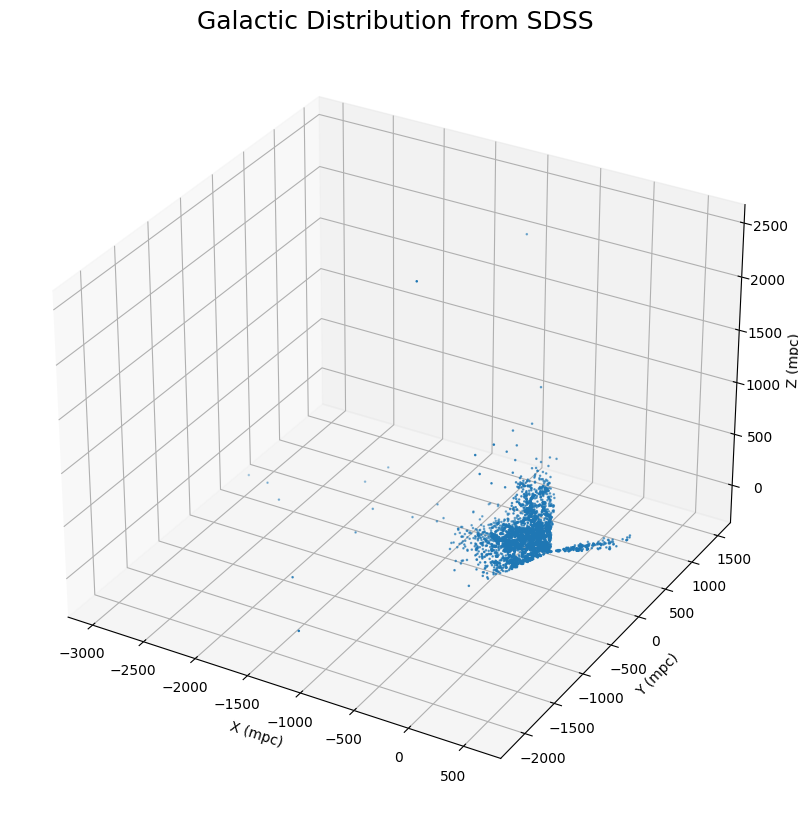

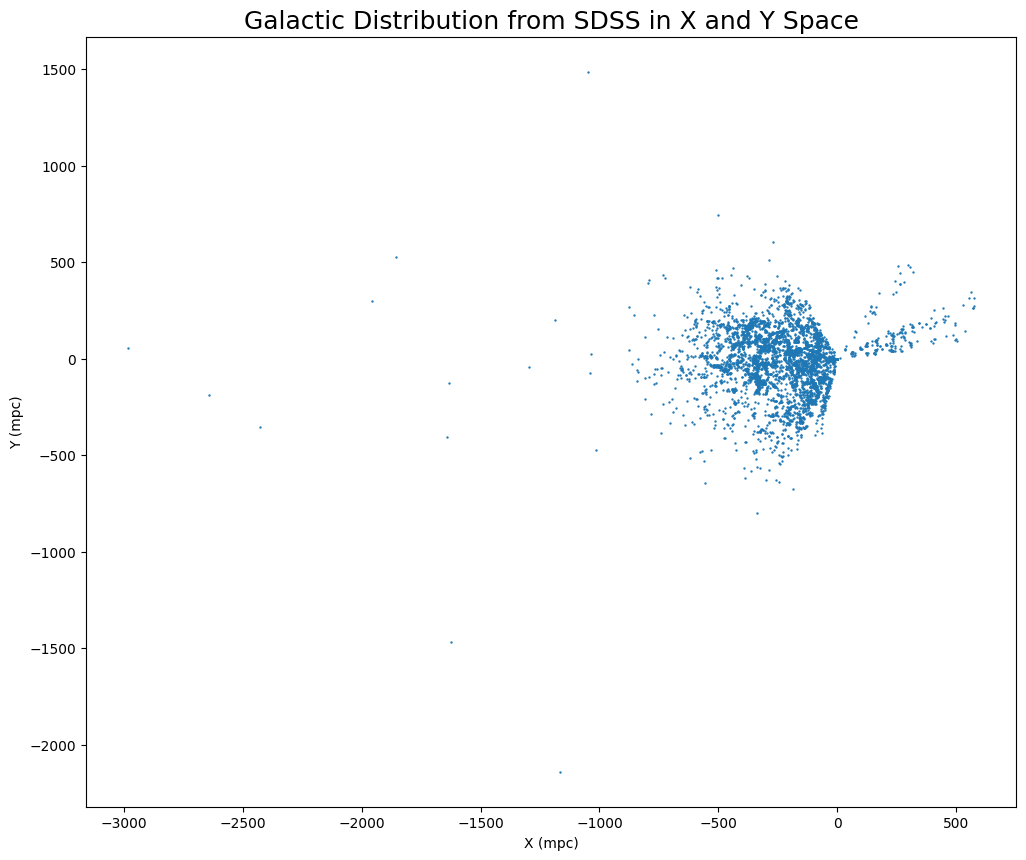

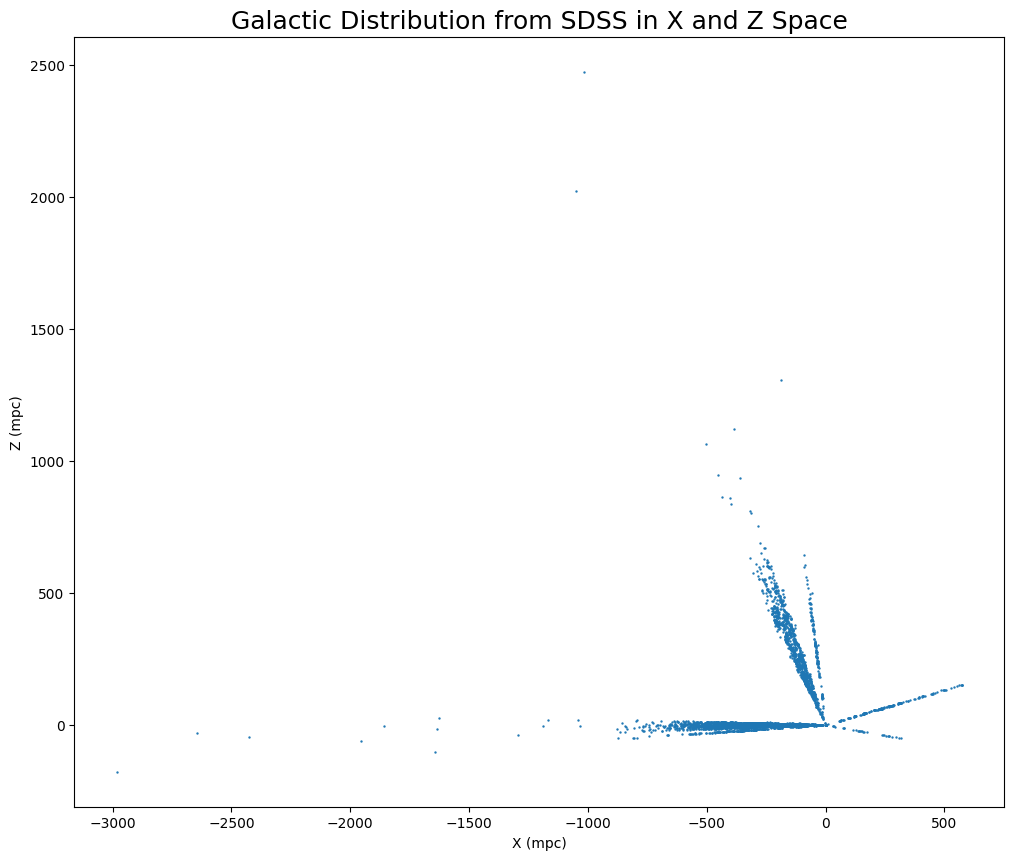

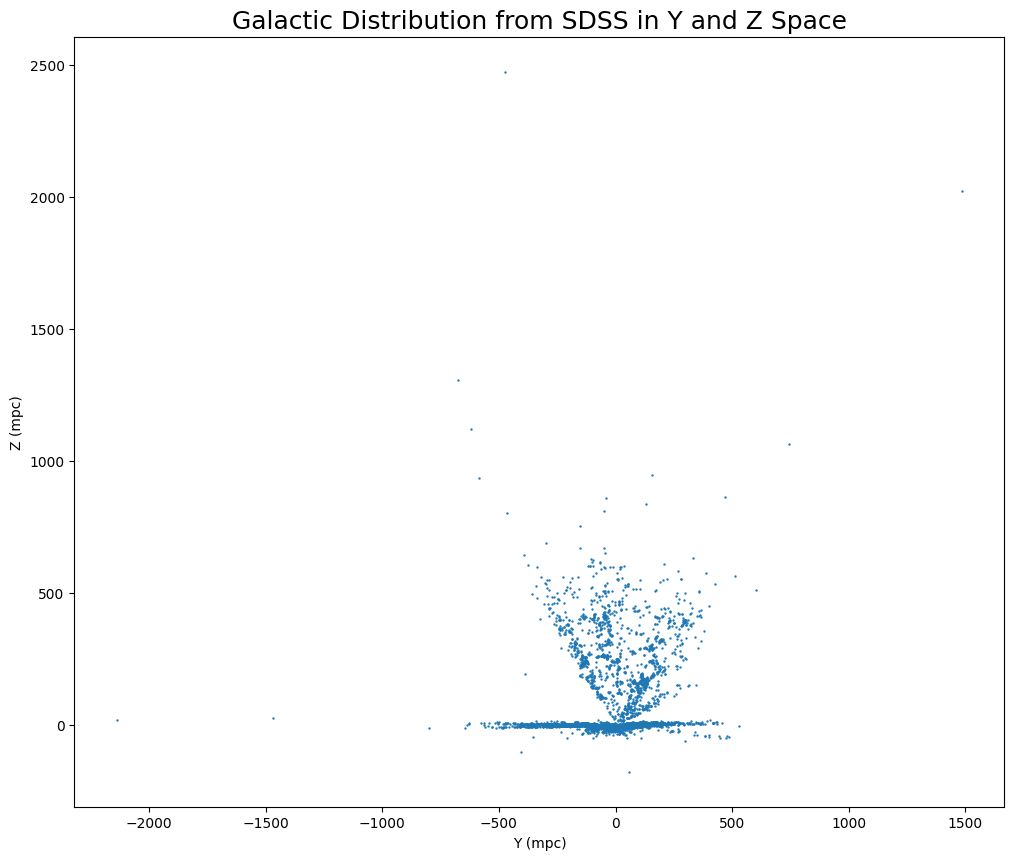

In [33]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfgal['x_coord'],dfgal['y_coord'],dfgal['z_coord'], s = 0.7)
ax.set_xlabel('X (mpc)')
ax.set_ylabel('Y (mpc)')
ax.set_zlabel('Z (mpc)')
ax.set_title('Galactic Distribution from SDSS',fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(dfgal['x_coord'],dfgal['y_coord'], s = 0.5)
ax.set_xlabel('X (mpc)')
ax.set_ylabel('Y (mpc)')
ax.set_title('Galactic Distribution from SDSS in X and Y Space',fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(dfgal['x_coord'],dfgal['z_coord'], s = 0.5)
ax.set_xlabel('X (mpc)')
ax.set_ylabel('Z (mpc)')
ax.set_title('Galactic Distribution from SDSS in X and Z Space',fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(dfgal['y_coord'],dfgal['z_coord'], s = 0.5)
ax.set_xlabel('Y (mpc)')
ax.set_ylabel('Z (mpc)')
ax.set_title('Galactic Distribution from SDSS in Y and Z Space',fontsize=18)
plt.show()

# Plot the distplot using seaborn 

C:\Users\Meet\AppData\Local\Temp\ipykernel_31764\127179432.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dfgal['redshift'])


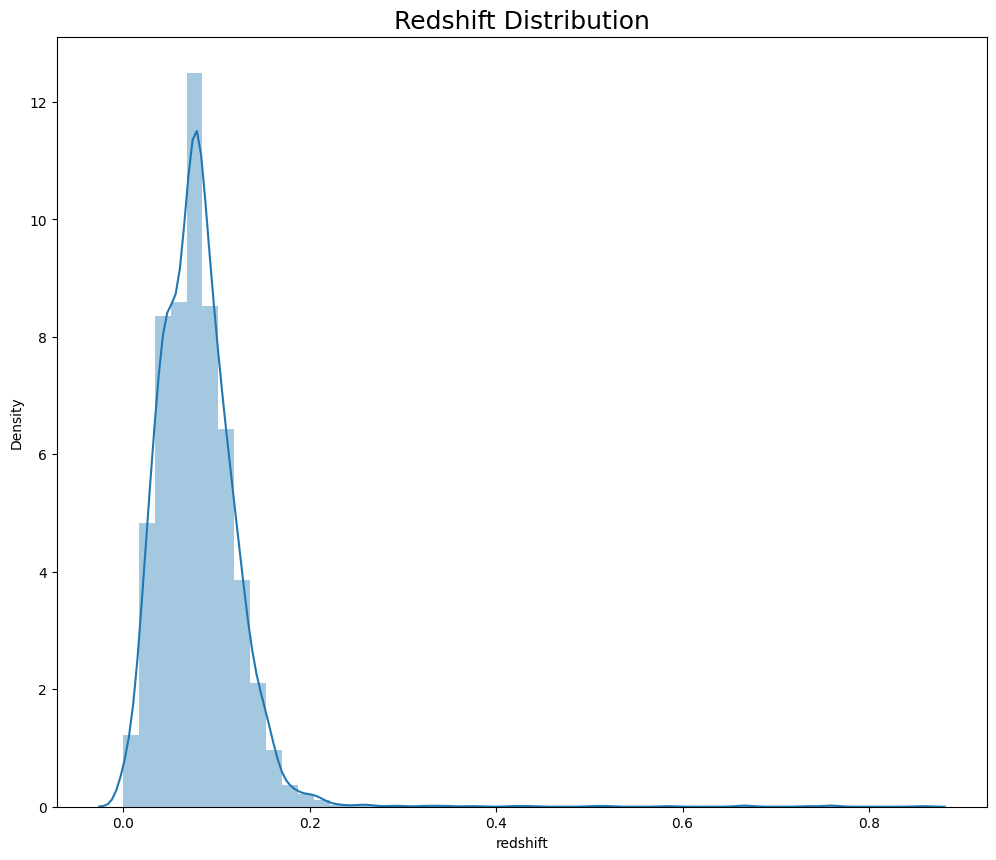

C:\Users\Meet\AppData\Local\Temp\ipykernel_31764\127179432.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dfgal['distance'])


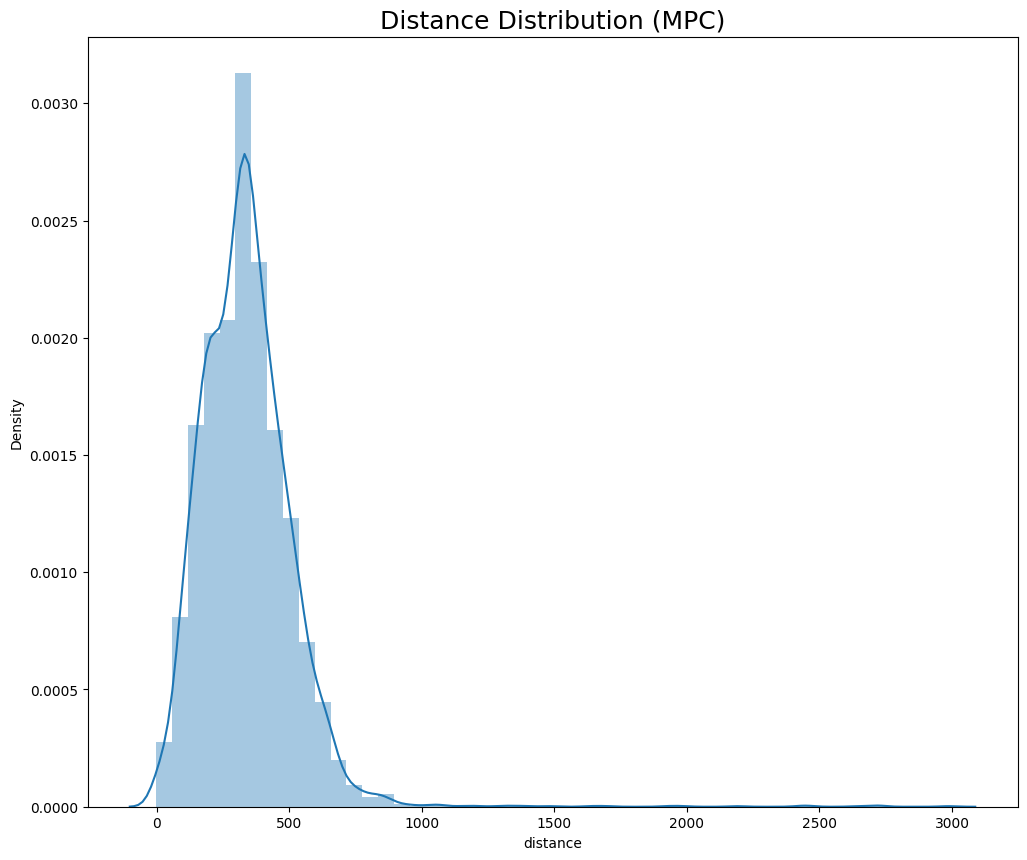

count    4998.000000
mean      339.207034
std       182.396605
min        -2.220465
25%       219.028538
50%       328.781154
75%       427.792624
max      2988.292437
Name: distance, dtype: float64

In [34]:
fig = plt.figure(figsize=(12,10))
sb.distplot(dfgal['redshift'])
plt.title('Redshift Distribution',fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,10))
sb.distplot(dfgal['distance'])
plt.title('Distance Distribution (MPC)',fontsize=18)
plt.show()

dfgal['redshift'].describe()
dfgal['distance'].describe()